In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

In [ ]:
df = pd.read_csv('dataset.csv')
df.head()

In [ ]:
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

In [ ]:
data = df

In [ ]:
data['timestamp'] = pd.to_datetime(data['timestamp'])
data.head()

In [ ]:
# create moving-averages
data['MA60'] = data['value'].rolling(60).mean()
data['MA365'] = data['value'].rolling(365).mean()
data.tail()

In [ ]:
data.head()

In [ ]:
data.to_csv("out_put.csv")

In [ ]:
# !pip install plotly

In [ ]:
# plot 
import plotly.express as px
fig = px.line(data, x="timestamp", y=['value', 'MA60', 'MA365'], title='NYC Taxi Trips', template = 'plotly_dark')
fig.show()

In [ ]:
# drop moving-average columns
data.drop(['MA60', 'MA365'], axis=1, inplace=True)
data.head()

In [ ]:
# set timestamp to index
data.set_index('timestamp', drop=True, inplace=True)
data.head()

In [ ]:
# resample timeseries to hourly 
data = data.resample('H').sum()
data.head()

In [ ]:
# creature features from date
data['day'] = [i.day for i in data.index]
data['day_name'] = [i.day_name() for i in data.index]
data['day_of_year'] = [i.dayofyear for i in data.index]
data['week_of_year'] = [i.weekofyear for i in data.index]
data['hour'] = [i.hour for i in data.index]
data['is_weekday'] = [i.isoweekday() for i in data.index]
data.head()

In [ ]:
# init setup
from pycaret.anomaly import *
s = setup(data, session_id = 42,
          ordinal_features = {'day_name' : ['Monday', 'Tuesday', 'Wednesday', 'Thursday',
       'Friday','Sunday','Saturday',]},
          numeric_features=['is_weekday'])

In [ ]:
# check list of available models
models()

In [ ]:
# train model
cluster = create_model('cluster')
cluster_results = assign_model(cluster)
cluster_results.head()

In [ ]:
!pip install sagemaker

In [1]:
from sagemaker import RandomCutForest

In [4]:
taxi_data  = pd.read_csv('dataset.csv', delimiter=",")
taxi_data .head()

,Unnamed: 0,timestamp,value
0,0,2014-07-01 00:00:00,10844
1,1,2014-07-01 00:30:00,8127
2,2,2014-07-01 01:00:00,6210
3,3,2014-07-01 01:30:00,4656
4,4,2014-07-01 02:00:00,3820


In [5]:
taxi_data.drop('Unnamed: 0', axis=1, inplace=True)
taxi_data.head()

,timestamp,value
0,2014-07-01 00:00:00,10844
1,2014-07-01 00:30:00,8127
2,2014-07-01 01:00:00,6210
3,2014-07-01 01:30:00,4656
4,2014-07-01 02:00:00,3820


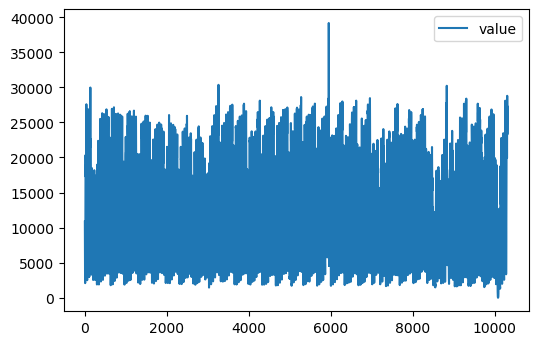

In [6]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams["figure.dpi"] = 100

taxi_data.plot()

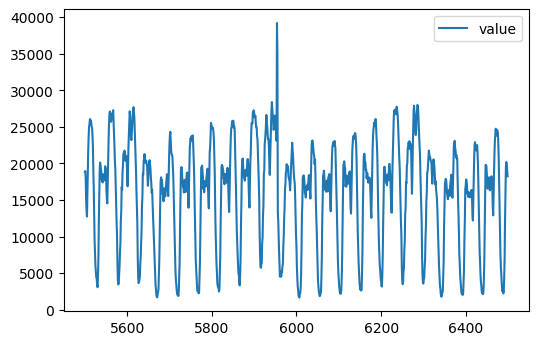

In [7]:
taxi_data[5500:6500].plot()

In [9]:
#taxi_data[5952:6000]

In [12]:
data = pd.read_csv('dataset.csv')
print(data.head())
print(len(data))
data = list(data['value'])[:10200]
print(len(data))

   Unnamed: 0            timestamp  value
0           0  2014-07-01 00:00:00  10844
1           1  2014-07-01 00:30:00   8127
2           2  2014-07-01 01:00:00   6210
3           3  2014-07-01 01:30:00   4656
4           4  2014-07-01 02:00:00   3820
10320
10200


In [13]:
data_train = data[: int(len(data) * 0.8)]
data_test = data[int(len(data) * 0.8):]

print("len train ", len(data_train))
print("len test ", len(data_test))

O_data_test = data_test

len train  8160
len test  2040


In [15]:
from sklearn.preprocessing import MinMaxScaler

minmaxSc = MinMaxScaler((-1,1))

data_train = np.array(data_train)
print(data_train.shape)
data_train = np.reshape(data_train, (int(data_train.shape[0] / 120), 120))
print(data_train.shape)

data_train = minmaxSc.fit_transform(data_train)
print(data_train.shape)

train, validate = np.array_split(data_train, [48], 1)
print(train.shape)
print(validate.shape)

train = np.reshape(train, (train.shape[0], train.shape[1], 1))
validate = np.reshape(validate, (validate.shape[0], validate.shape[1], 1))
print(train.shape)
print(validate.shape)

(8160,)
(68, 120)
(68, 120)
(68, 48)
(68, 72)
(68, 48, 1)
(68, 72, 1)


In [22]:
!pip install keras_tuner

  Using cached keras_tuner-1.1.3-py3-none-any.whl (135 kB)
  Using cached tensorboard-2.10.1-py3-none-any.whl (5.9 MB)
  Using cached kt_legacy-1.0.4-py3-none-any.whl (9.6 kB)
  Using cached google_auth_oauthlib-0.4.6-py2.py3-none-any.whl (18 kB)
  Using cached google_auth-2.12.0-py2.py3-none-any.whl (169 kB)
  Using cached tensorboard_data_server-0.6.1-py3-none-any.whl (2.4 kB)
  Using cached tensorboard_plugin_wit-1.8.1-py3-none-any.whl (781 kB)
  Using cached absl_py-1.2.0-py3-none-any.whl (123 kB)
  Using cached Markdown-3.4.1-py3-none-any.whl (93 kB)
  Using cached requests_oauthlib-1.3.1-py2.py3-none-any.whl (23 kB)
  Using cached pyasn1_modules-0.2.8-py2.py3-none-any.whl (155 kB)
  Using cached cachetools-5.2.0-py3-none-any.whl (9.3 kB)
  Using cached oauthlib-3.2.1-py3-none-any.whl (151 kB)
  Using cached pyasn1-0.4.8-py2.py3-none-any.whl (77 kB)
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfull

ERROR: pytest-astropy 0.8.0 requires pytest-cov>=2.0, which is not installed.
ERROR: pytest-astropy 0.8.0 requires pytest-filter-subpackage>=0.1, which is not installed.
ERROR: sagemaker 2.112.1 has requirement importlib-metadata<5.0,>=1.4.0, but you'll have importlib-metadata 5.0.0 which is incompatible.
ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'c:\\users\\tannu\\anaconda3\\lib\\site-packages\\google\\~rotobuf\\internal\\_api_implementation.cp37-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [23]:
import keras_tuner as kt

def bayesianOptimizationLSTMAutoencoderModel(trainData, validateData, numOfObservedRecords, numOfPredictingRecords):
    hyperModel = LstmAutoencoderModel(
        numOfObservedRecords=numOfObservedRecords,
        numOfPredictingRecords=numOfPredictingRecords,
        numOfFeatures=trainData.shape[2])
    bayesianTuner = kt.tuners.BayesianOptimization(
        hyperModel,
        objective="val_loss",
        max_trials=3,
        project_name='kerastuner_bayesian_poc',
        executions_per_trial=5,
        overwrite=True)
    bayesianTuner.search(trainData, validateData, epochs=100,
                         validation_split=0.2, verbose=0)
    return bayesianTuner.get_best_models(num_models=1)[0]  # get best model

ModuleNotFoundError: No module named 'keras_tuner'

In [19]:
model = bayesianOptimizationLSTMAutoencoderModel(train, validate, 48, 72)

NameError: name 'bayesianOptimizationLSTMAutoencoderModel' is not defined